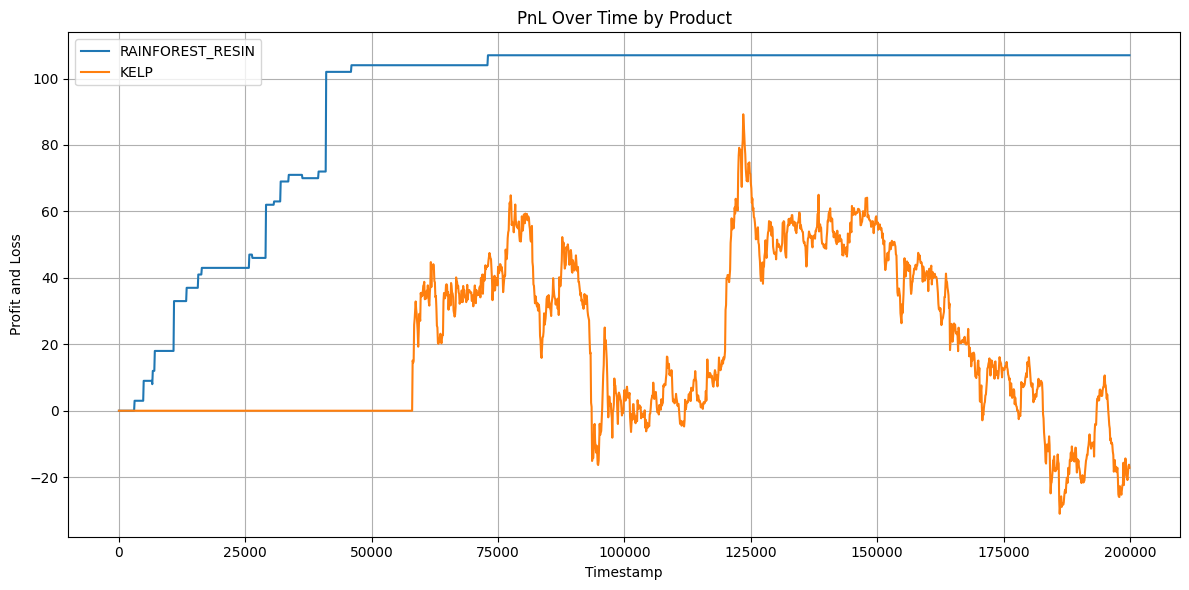

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

results_path = "results.csv"  

df_raw = pd.read_csv(results_path)
df_split = df_raw.iloc[:, 0].str.split(";", expand=True)

df_split.columns = [
    "day", "timestamp", "product",
    "bid_price_1", "bid_volume_1",
    "bid_price_2", "bid_volume_2",
    "bid_price_3", "bid_volume_3",
    "ask_price_1", "ask_volume_1",
    "ask_price_2", "ask_volume_2",
    "ask_price_3", "ask_volume_3",
    "mid_price", "profit_and_loss"
]

df_split["timestamp"] = pd.to_numeric(df_split["timestamp"], errors="coerce")
df_split["profit_and_loss"] = pd.to_numeric(df_split["profit_and_loss"], errors="coerce")
df_split["product"] = df_split["product"].astype(str)

plt.figure(figsize=(12, 6))
for product in df_split["product"].unique():
    product_data = df_split[df_split["product"] == product]
    plt.plot(product_data["timestamp"], product_data["profit_and_loss"], label=product)

plt.xlabel("Timestamp")
plt.ylabel("Profit and Loss")
plt.title("PnL Over Time by Product")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
